In [1]:
# Dependencies
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
mypassword = os.getenv("POSTGRESQL_PASSWORD")

In [2]:
# Create engine
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:' + mypassword + '@localhost:5432/employee_db')
connection = engine.connect()

In [3]:
# Query all the records in the 'salaries' table.
salaries_data = pd.read_sql("SELECT * FROM salaries", connection)

# Preview 'salaries' data
salaries_data.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
# Query all the records in the 'titles' table.
titles_data = pd.read_sql("SELECT * FROM titles", connection)

# Preview 'titles' data
titles_data.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [5]:
# Combine 'salaries' and 'titles' tables with 'merge'
combined_data = pd.merge(salaries_data, titles_data, on="emp_no", how="inner")

# Preview combined_data
combined_data.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


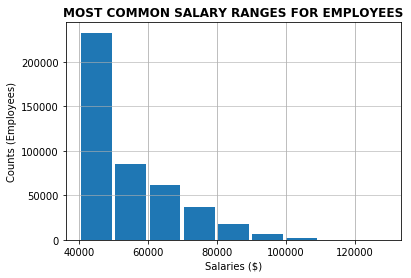

In [6]:
# MOST COMMON SALARY RANGES FOR EMPLOYEES - HISTOGRAM
combined_data.hist(column='salary', bins=9, rwidth=0.9)

# Incorporate the other graph properties
plt.title('MOST COMMON SALARY RANGES FOR EMPLOYEES', fontweight="bold")
plt.xlabel('Salaries ($)')
plt.ylabel('Counts (Employees)')
plt.grid(axis='y', alpha=0.75)

# Save the figure as .png.
plt.savefig('C:/Users/Jenni/UNCCDABC/Homeworks/sql-challenge/Images/SalaryRangesHisto.png')

# Show plot
plt.show()

In [7]:
# MOST COMMON SALARY RANGES FOR EMPLOYEES - BAR CHART
# Create bins in which to place values based upon the 'salaries' data.
salaries_bins = [0, 50000, 60000, 70000, 80000, 90000, 100000, 110000,
            120000, 140000]

# Create labels for these bins
salaries_labels = ["<50,000", "50,001-60,000", "60,001-70,000", "70,001-80,000",
              "80,001-90,000", "90,001-100,000", "100,001-110,000",
              "110,001-120,000", ">120,000"]

# Place the data series into a new column inside of the DataFrame
combined_data["Salary Group"] = pd.cut(combined_data["salary"], salaries_bins,
                                      labels=salaries_labels)

# Create a GroupBy object based upon "Salary Group"
# Categorize the existing players using the age bins
salary_group = combined_data.groupby("Salary Group")
total_count_salary = salary_group.nunique()["emp_no"]

# Summary table for Salary Ranges
salary_ranges_df = pd.DataFrame({"Total Count": total_count_salary})

# Reset Index
salary_ranges_df = salary_ranges_df.reset_index()

# Preview data
salary_ranges_df

,Salary Group,Total Count
0,"<50,000",158472
1,"50,001-60,000",57917
2,"60,001-70,000",41405
3,"70,001-80,000",24814
4,"80,001-90,000",11844
5,"90,001-100,000",4285
6,"100,001-110,000",1068
7,"110,001-120,000",195
8,">120,000",24


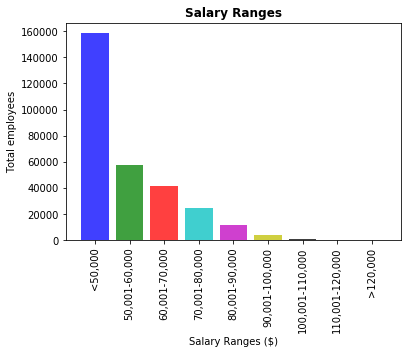

In [8]:
# Plot a Bar Chart of average salary by title
# Set up x-axis, y-axis and ticks
x_axis = salary_ranges_df["Salary Group"]
y_axis = salary_ranges_df["Total Count"]
ticks = np.arange(len(x_axis))

# Create Bar Chart based on 'salary_ranges_df' data
plt.bar(x_axis, y_axis, align='center', alpha=.75,        
        color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.xticks(ticks, x_axis, rotation='vertical')

# Incorporate the other graph properties
# plt.ylim(-5, 105)
plt.title('Salary Ranges', fontweight="bold")
plt.xlabel('Salary Ranges ($)')
plt.ylabel('Total employees')

# Save the figure as .png.
plt.savefig('C:/Users/Jenni/UNCCDABC/Homeworks/sql-challenge/Images/SalaryRanges.png')

# Show plot
plt.show()

In [9]:
# Average salary by title
combined_groups = combined_data.groupby("title").mean()
combined_groups

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


In [10]:
# Drop 'emp_no' column that is not necessary for the next step
revised_groups = combined_groups.drop(columns="emp_no")

# Reset Index
revised_groups = revised_groups.reset_index()

# Preview data
revised_groups.style.format({'salary': "${:.0f}"})

,title,salary
0,Assistant Engineer,$48493
1,Engineer,$48540
2,Manager,$51531
3,Senior Engineer,$48507
4,Senior Staff,$58503
5,Staff,$58465
6,Technique Leader,$48581


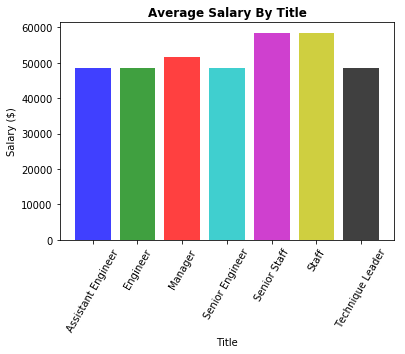

In [11]:
# Plot a Bar Chart of average salary by title
# Set up x-axis, y-axis and ticks
x_axis = revised_groups["title"]
y_axis = revised_groups["salary"]
ticks = np.arange(len(x_axis))

# Create Bar Chart based on 'revised_groups' data
plt.bar(x_axis, y_axis, align='center', alpha=.75,
        color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.xticks(ticks, x_axis, rotation=60)

# Incorporate the other graph properties
# plt.ylim(-5, 105)
plt.title('Average Salary By Title', fontweight="bold")
plt.xlabel('Title')
plt.ylabel('Salary ($)')

# Save the figure as .png.
plt.savefig('C:/Users/Jenni/UNCCDABC/Homeworks/sql-challenge/Images/AverageSalaryTitle.png')

# Show plot
plt.show()